# ARPS Exponential Equation

persamaan ARPS dinyatakan dengan $$ Qt = Qi * (1 + bDt)^\frac{1}{b} $$

q = current production rate

q i = initial production rate (start of production)

d i = initial nominal decline rate at t = 0

t = cumulative time since start of production 

b= hyperbolic decline constant (0 < b < 1) 

$$ a = \frac{qt}{dq/dt} $$
$$ D = \frac{1}{a} $$
b formula is : $$ \frac{d\Bigl(\frac{qt}{(dqt/dt)}\Bigr)}{dt} $$

In [67]:
import math
import pandas
import numpy as np
import matplotlib.pyplot as plt

# DATA DARI 2014 - 2017 UNTUK PREDIKSI 2018

In [68]:
#Pengambilan data dari csv
dd = pandas.read_csv('Kereta eR eL.csv', delimiter=';', index_col='Bulan')
nama_bulan=("Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember")

In [69]:
print("Data original dari CSV\n")
print(dd)

Data original dari CSV

           Pengguna   Tahun
Bulan                      
Januari       15176  2014.0
Februari      14856     NaN
Maret         17471     NaN
April         16671     NaN
Mei           16781     NaN
Juni          17848     NaN
Juli          16585     NaN
Agustus       17091     NaN
September     18253     NaN
Oktober       19079     NaN
November      18605     NaN
Desember      20080     NaN
Januari       19244  2015.0
Februari      17640     NaN
Maret         21290     NaN
April         21171     NaN
Mei           22177     NaN
Juni          22207     NaN
Juli          21171     NaN
Agustus       22295     NaN
September     22021     NaN
Oktober       22964     NaN
November      22355     NaN
Desember      22996     NaN
Januari       22238  2016.0
Februari      21229     NaN
Maret         23206     NaN
April         23149     NaN
Mei           24401     NaN
Juni          23821     NaN
Juli          21574     NaN
Agustus       23923     NaN
September     23570     

In [70]:
datad = dd['Pengguna'][0:48]
print("Data penguna KRL tahun 2014-2017\n")
print(datad)

Data penguna KRL tahun 2014-2017

Bulan
Januari      15176
Februari     14856
Maret        17471
April        16671
Mei          16781
Juni         17848
Juli         16585
Agustus      17091
September    18253
Oktober      19079
November     18605
Desember     20080
Januari      19244
Februari     17640
Maret        21290
April        21171
Mei          22177
Juni         22207
Juli         21171
Agustus      22295
September    22021
Oktober      22964
November     22355
Desember     22996
Januari      22238
Februari     21229
Maret        23206
April        23149
Mei          24401
Juni         23821
Juli         21574
Agustus      23923
September    23570
Oktober      24533
November     24104
Desember     24841
Januari      24185
Februari     21743
Maret        25775
April        25411
Mei          27385
Juni         24432
Juli         27016
Agustus      27679
September    26158
Oktober      28765
November     28246
Desember     29059
Name: Pengguna, dtype: int64


In [71]:
a=12.192573
b=352.15449
D1 = 1/a
output=[]
for t in range (49, 61):
    hasil = (((b*D1*t)+1)**(1/b))*datad[46]
    output.append(hasil)

In [72]:
print("Hasil prediksi pengguna KRL tahun 2018 dari data tahun 2014 - 2017\n")
for i in range(len(output)):
    print(nama_bulan[i], end=': ')
    print(output[i])

Hasil prediksi pengguna KRL tahun 2018 dari data tahun 2014 - 2017

Januari: 28834.015778079236
Februari: 28835.668844259268
Maret: 28837.28928870223
April: 28838.87837577953
Mei: 28840.437297717777
Juni: 28841.96717998646
Juli: 28843.4690861918
Agustus: 28844.944022530148
September: 28846.392941847706
Oktober: 28847.816747347515
November: 28849.21629597998
Desember: 28850.592401548736


In [73]:
mse=[]
rata_mse=0
for i in range(len(output)):
    m=(output[i]-dd['Pengguna'][i+48])**2
    mse.append(m)
    rata_mse+=m

In [74]:
print("Hasil Mean Square Error setiap bulan\n")
for i in range(len(output)):
    print(nama_bulan[i], end=': ')
    print(int(mse[i]))

Hasil Mean Square Error setiap bulan

Januari: 576104
Februari: 12066375
Maret: 148772
April: 10634
Mei: 23889
Juni: 16071817
Juli: 58821
Agustus: 557925
September: 1508949
Oktober: 220132
November: 640346
Desember: 122785


In [75]:
print("Hasil rata-rata MSE: ", end='')
print(int(rata_mse/12))

Hasil rata-rata MSE: 2667212


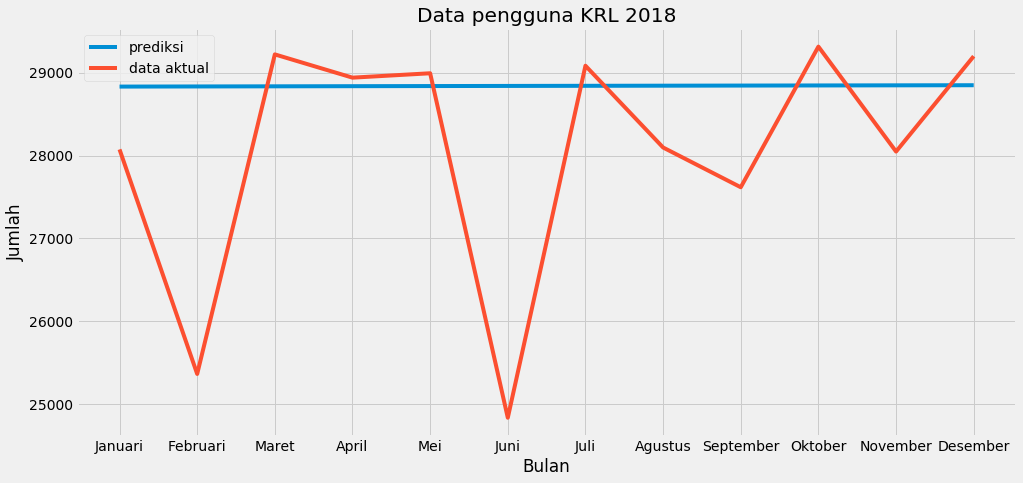

In [76]:
df = pandas.read_csv('Kereta RL.csv', delimiter=';', index_col='Bulan')
x = (df['Pengguna'][11:24])
y = (output)
arps = y
x=x[1:len(x)]
plt.figure(figsize=(15,7))
plt.plot(nama_bulan, y, label='prediksi')
plt.plot(nama_bulan, x, label='data aktual')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Data pengguna KRL 2018')
plt.grid(True)
plt.legend()
plt.show()

# DATA DARI 2017 UNTUK PREDIKSI 2018

In [91]:
#Pengambilan data dari csv
data = df['Pengguna'][0:12]
print("Data original dari CSV\n")
print(df)

Data original dari CSV

           Pengguna   Tahun
Bulan                      
Januari       24185  2017.0
Februari      21743     NaN
Maret         25775     NaN
April         25411     NaN
Mei           27385     NaN
Juni          24432     NaN
Juli          27016     NaN
Agustus       27679     NaN
September     26158     NaN
Oktober       28765     NaN
November      28246     NaN
Desember      29059     NaN
Januari       28075  2018.0
Februari      25362     NaN
Maret         29223     NaN
April         28942     NaN
Mei           28995     NaN
Juni          24833     NaN
Juli          29086     NaN
Agustus       28098     NaN
September     27618     NaN
Oktober       29317     NaN
November      28049     NaN
Desember      29201     NaN


In [95]:
#Pemrosesan ARPS
a = 107.435
D1 = 1/a
b = 224.9259
output=[]
for t in range (13, 25):
    hasil = (((b*D1*t)+1)**(1/b))*data[10]
    output.append(hasil)

In [96]:
mse=[]
rata_mse=0
for i in range(len(output)):
    m=(output[i]-df['Pengguna'][i+12])**2
    mse.append(m)
    rata_mse+=m

In [97]:
print("Data penguna KRL tahun 2017\n")
print(data)

Data penguna KRL tahun 2017

Bulan
Januari      24185
Februari     21743
Maret        25775
April        25411
Mei          27385
Juni         24432
Juli         27016
Agustus      27679
September    26158
Oktober      28765
November     28246
Desember     29059
Name: Pengguna, dtype: int64


In [98]:
print("Data penguna KRL tahun 2018\n")
print(df['Pengguna'][12:24])

Data penguna KRL tahun 2018

Bulan
Januari      28075
Februari     25362
Maret        29223
April        28942
Mei          28995
Juni         24833
Juli         29086
Agustus      28098
September    27618
Oktober      29317
November     28049
Desember     29201
Name: Pengguna, dtype: int64


In [99]:
print("Hasil prediksi pengguna KRL tahun 2018 dari data tahun 2017\n")
for i in range(len(output)):
    print(nama_bulan[i], end=': ')
    print(output[i])

Hasil prediksi pengguna KRL tahun 2018 dari data tahun 2017

Januari: 28668.553425291397
Februari: 28677.677455452467
Maret: 28686.19445908693
April: 28694.18034208967
Mei: 28701.6975985284
Juni: 28708.798296185232
Juli: 28715.52627483555
Agustus: 28721.918793972123
September: 28728.007787590843
Oktober: 28733.820833395705
November: 28739.381911042783
Desember: 28744.71200224037


In [100]:
print("Hasil Mean Square Error setiap bulan\n")
for i in range(len(output)):
    print(nama_bulan[i], end=': ')
    print(int(mse[i]))

Hasil Mean Square Error setiap bulan

Januari: 352305
Februari: 10993716
Maret: 288160
April: 61414
Mei: 86026
Juni: 15021812
Juli: 137250
Agustus: 389274
September: 1232117
Oktober: 340097
November: 476627
Desember: 208198


In [101]:
print("Hasil rata-rata MSE: ", end='')
print(int(rata_mse/12))

Hasil rata-rata MSE: 2465583


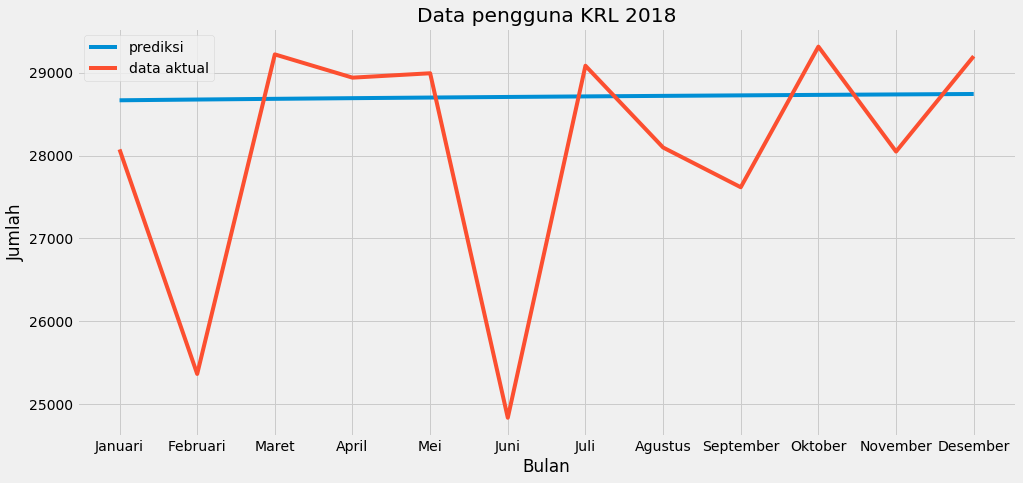

In [102]:
x = (df['Pengguna'][11:24])
y = (output)
x=x[1:len(x)]
plt.figure(figsize=(15,7))
plt.plot(nama_bulan, y, label='prediksi')
plt.plot(nama_bulan, x, label='data aktual')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Data pengguna KRL 2018')
plt.grid(True)
plt.legend()
plt.show()

# PREDIKSI MENGGUNAKAN SARIMA

In [103]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

data = sm.datasets.co2.load_pandas()
y = data.data

def parser(x):
    return pd.datetime.strptime('20'+x, '%Y-%m')
 
y = pd.read_csv('dataKRL.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)['2014-01-01':]

print(y)

Periode
2014-01-01    15176
2014-02-01    14856
2014-03-01    17471
2014-04-01    16671
2014-05-01    16781
2014-06-01    17848
2014-07-01    16585
2014-08-01    17091
2014-09-01    18253
2014-10-01    19079
2014-11-01    18605
2014-12-01    20080
2015-01-01    19244
2015-02-01    17640
2015-03-01    21290
2015-04-01    21171
2015-05-01    22177
2015-06-01    22207
2015-07-01    21171
2015-08-01    22295
2015-09-01    22021
2015-10-01    22964
2015-11-01    22355
2015-12-01    22996
2016-01-01    22238
2016-02-01    21229
2016-03-01    23206
2016-04-01    23149
2016-05-01    24401
2016-06-01    23821
2016-07-01    21574
2016-08-01    23923
2016-09-01    23570
2016-10-01    24533
2016-11-01    24104
2016-12-01    24841
2017-01-01    24185
2017-02-01    21743
2017-03-01    25775
2017-04-01    25411
2017-05-01    27385
2017-06-01    24432
2017-07-01    27016
2017-08-01    27679
2017-09-01    26158
2017-10-01    28765
2017-11-01    28246
2017-12-01    29059
2018-01-01    28075
2018-02-01  

In [104]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [105]:
#Menentukan order arima untuk membentuk AIC terkecil
warnings.filterwarnings("ignore") # specify to ignore warning messages

lowest=100000.0

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if (lowest > results.aic):
                lowest = results.aic
                isLowest = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, lowest)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('LOWEST AIC = ' + isLowest)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1358.52205733662
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1037.1055286226388
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:889.0358227840346
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1531.2687718771906
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:857.7860345053225
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:825.5642808577144
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:651.875320700669
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1437.250753132414
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1297.305924979187
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1024.1817143635576
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:837.1476482839154
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1437.4208283272374
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1063.1515083213476
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:797.297663403553
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:642.0612702413241
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1375.4195229380375
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1031.8436582897264
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:798.454409095327
ARIMA(0

In [106]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                               )

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3276      0.300     -1.090      0.276      -0.917       0.261
ma.L1         -0.3330      0.303     -1.100      0.271      -0.926       0.260
ar.S.L12      -0.1170      0.188     -0.623      0.533      -0.485       0.251
sigma2      1.246e+06   2.63e+05      4.735      0.000     7.3e+05    1.76e+06


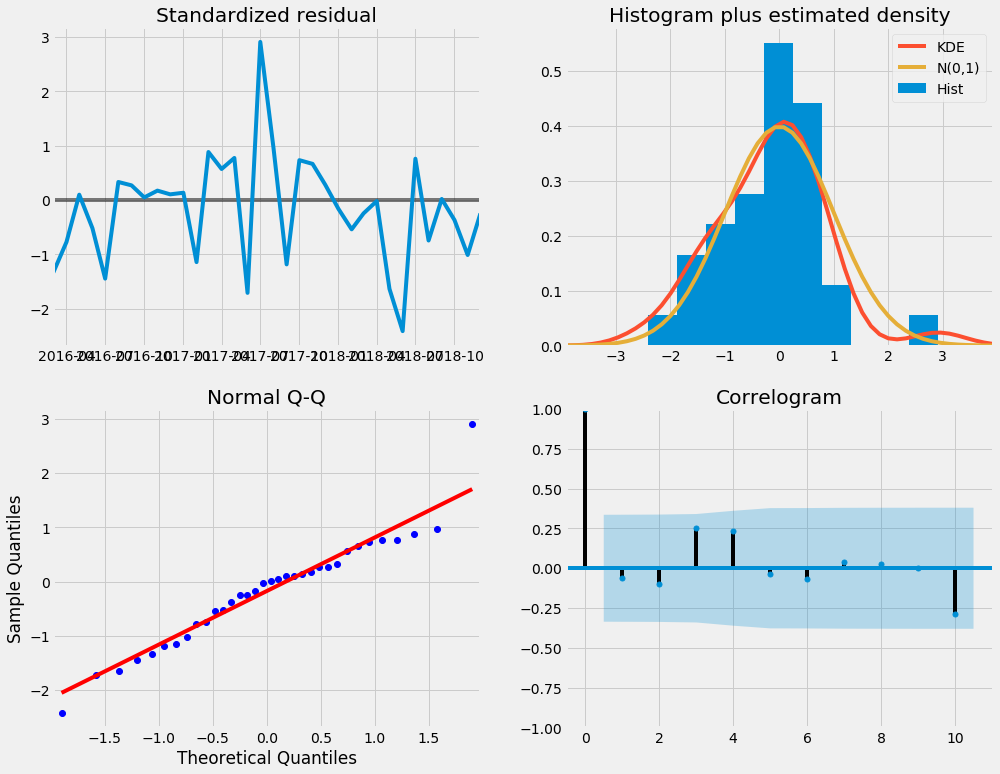

In [107]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

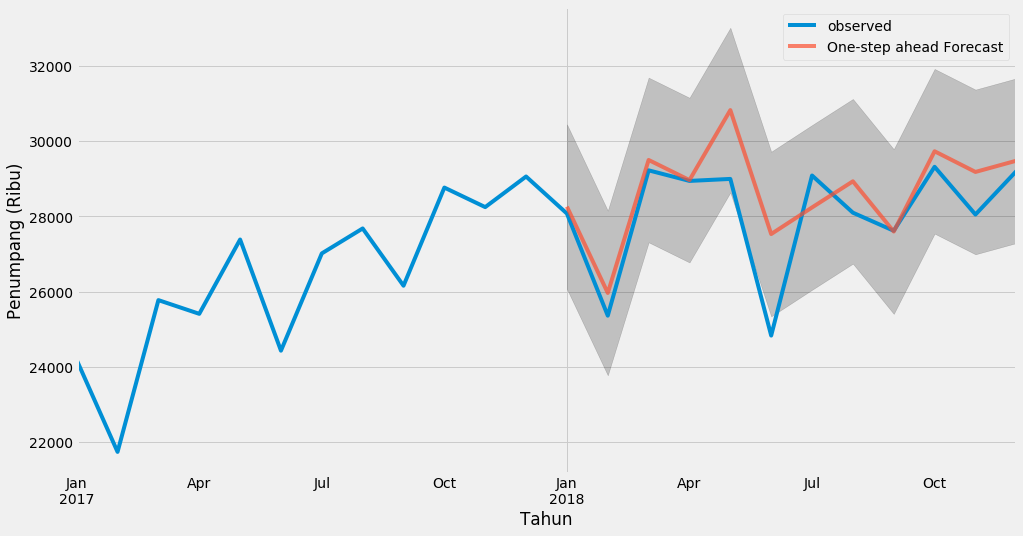

In [108]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
plt.figure(figsize=(15,8))
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Tahun')
ax.set_ylabel('Penumpang (Ribu)')
plt.legend()

plt.show()

In [109]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1169525.72


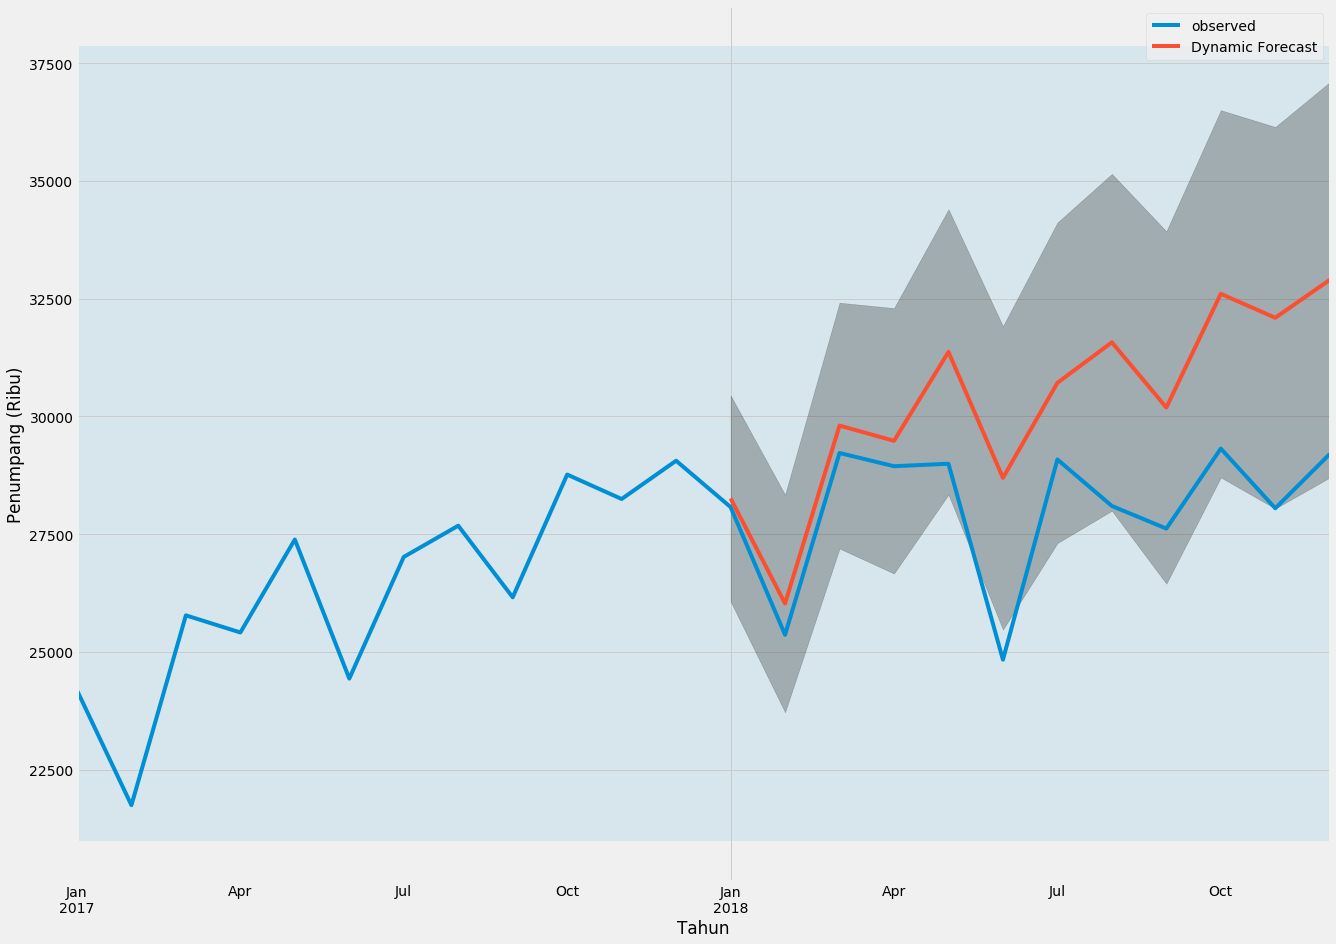

In [110]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
ax = y['2017':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Tahun')
ax.set_ylabel('Penumpang (Ribu)')

plt.legend()
plt.show()

In [111]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6987920.92


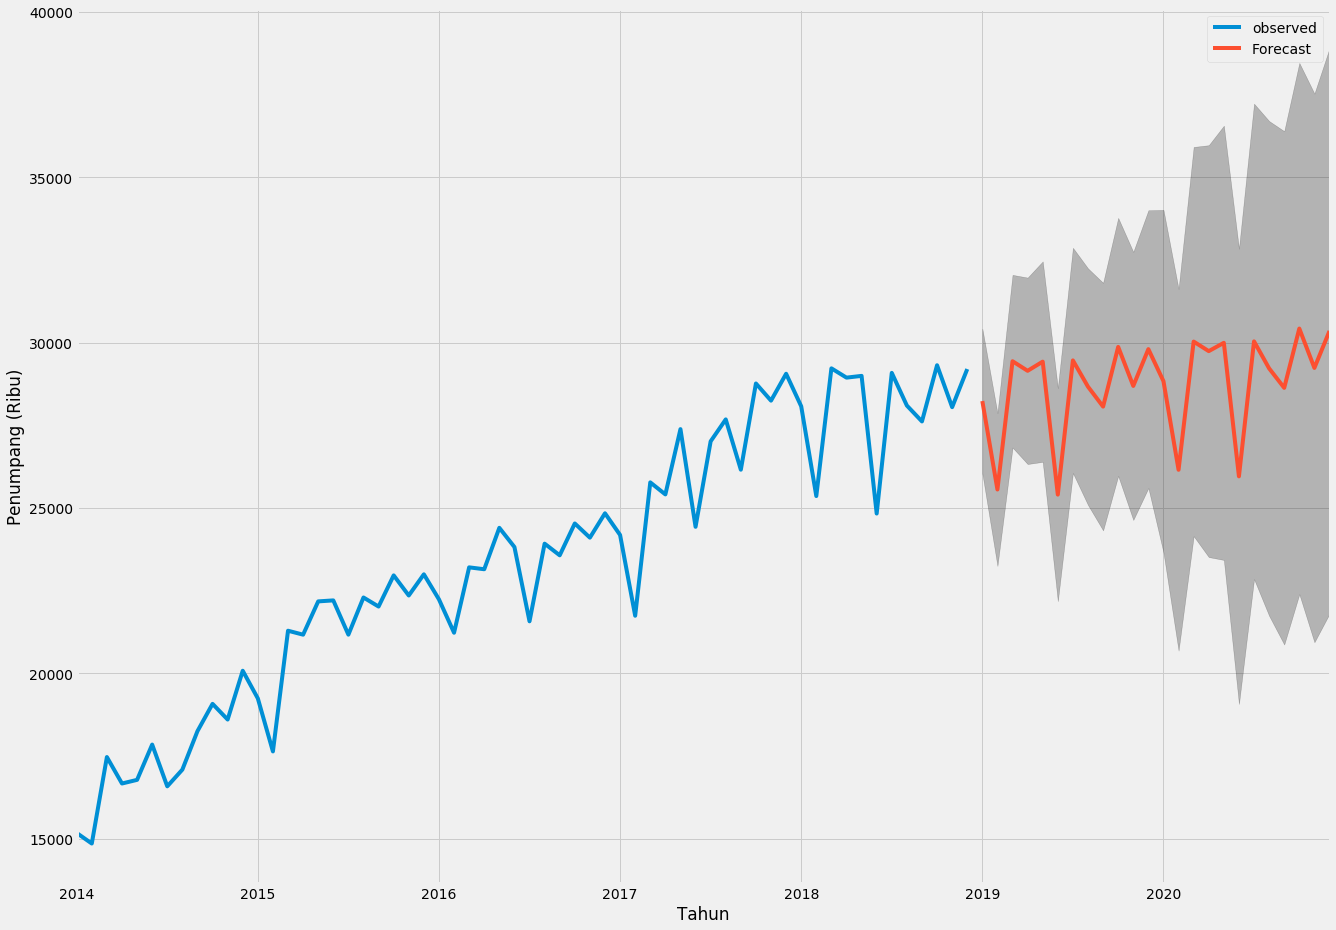

In [112]:
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Tahun')
ax.set_ylabel('Penumpang (Ribu)')

plt.legend()
plt.show()

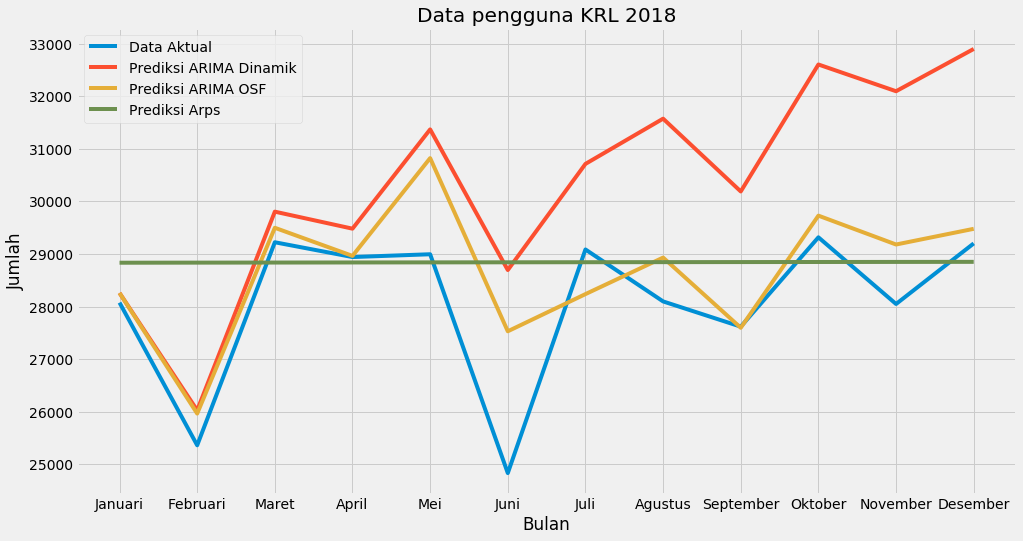

In [115]:
#pred_dynamic.predicted_mean.plot()
#y['2018-01-01':].plot()
#arps.data.plot()
plt.figure(figsize=(15,8))
plt.plot(nama_bulan, y['2018-01-01':], label='Data Aktual')
plt.plot(nama_bulan, pred_dynamic.predicted_mean, label='Prediksi ARIMA Dinamik')
plt.plot(nama_bulan, pred.predicted_mean, label='Prediksi ARIMA OSF')
plt.plot(nama_bulan, arps, label='Prediksi Arps')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Data pengguna KRL 2018')
plt.grid(True)
plt.legend()
plt.show()